2900
(0.011536197736859322, 0.8958864808082581) (0.2508015036582947, 0.2494085729122162) 0.6893341512034068
(2000, 2) (2000,)


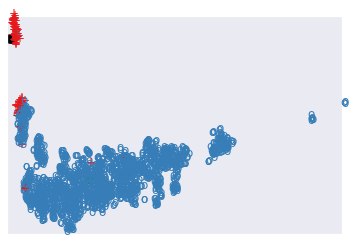

In [2]:
import json
import numpy as np
# %matplotlib inline
import pandas as pd
from glob import glob
from pdb import set_trace
from pathlib import Path
import seaborn as sns;
from sklearn.model_selection import train_test_split

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# --- Configure seaborn ---
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# sns.set_style({'font.family': 'Palatino'})
# sns.set_style("ticks")
# sns.set_context("poster", font_scale=1.75, rc={"lines.linewidth": 4.5})
# colors = ["pale red", "windows blue", "green grey", "dusty purple", "amber", "faded green"]
# sns.set_palette(sns.xkcd_palette(colors))


def calculate_centroids(_features, _labels):
    pos = []
    neg = []
    for f, l  in zip(_features, _labels):
        if l == 1:
            pos.append(f)
        else:
            neg.append(f)
    posx = [x[0] for x in pos]
    posy = [x[1] for x in pos]
    negx = [x[0] for x in neg]
    negy = [x[1] for x in neg]
    _px = np.median(posx)
    _py = np.median(posy)
    _nx = np.median(negx)
    _ny = np.median(negy)
    return (_px, _py), (_nx, _ny)
    pass


def calculate_distance(p1, p2):
    return np.abs(np.sqrt(((p1[0] - p2[0])*(p1[0] - p2[0])) + ((p1[1] - p2[1])*(p1[1] - p2[1]))))
    pass

import matplotlib.patches as patches

if __name__ == '__main__':
    input_file = 'tsne-tsne-features.json'
    # input_file = '/home/saikatc/DATA/CCS-Vul_Det/real_data_scripts/results/draper-devign-tsne-results.json'
    output_file = 'Revel-tsne.pdf'
    _features, _labels = json.load(open(input_file))

    features = []
    labels = []
    r = 1.0
    for f, l in zip(_features, _labels):
        if f[0] <= r and f[1] <= r:
            features.append([f[0] * (1/r), f[1]* (1/r)])
            labels.append(l)
    pmed, nmed = calculate_centroids(features, labels)
    dist = calculate_distance(pmed, nmed)
    print(len(_features))
    if len(_features) > 2000:
        _, features, _,  labels = train_test_split(features, labels, test_size=2000)
    print(pmed, nmed, dist)
    features = np.array(features)
    X = features
    labels = np.array(labels)
    Y = labels
    print(X.shape, Y.shape)
    fig, ax = plt.subplots()

    for i in range(X.shape[0]):
        if Y[i] == 0:
            ax.text(X[i, 0], X[i, 1], 'o',
                     color=plt.cm.Set1(1),
                     fontdict={'size': 12})
        else:
            ax.text(X[i, 0], X[i, 1], '+',
                     color=plt.cm.Set1(0),
                     fontdict={ 'size': 12})
    pc = patches.Circle(xy=pmed, radius=0.02, color='black')
    nc = patches.Circle(xy=nmed, radius=0.02, color='green')
    # plt.text(pmed[0], pmed[1], '+', color=plt.cm.Set1(0),
    #          fontdict={'weight': 'bold', 'size': 25})
    # plt.text(nmed[0], nmed[1], 'o', color=plt.cm.Set1(1),
    #          fontdict={'weight': 'bold', 'size': 25})
    ax.add_patch(pc)
    ax.add_patch(nc)
    plt.xticks([]), plt.yticks([])
    plt.savefig(output_file)
    plt.show()
    pass